In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('student-data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [2]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [8]:
df.shape

(395, 31)

In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [11]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


### feature engineering

In [13]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [19]:
#can reduce the columns by combining mother's education and father's education
#can combine freetime and goout 
#combine Dalc and Walc

df['Paredu'] = df['Medu']+df['Fedu']
df['liesure_time'] = df['freetime']+df['goout']
df['Alc'] = df['Dalc']+df['Walc']

In [21]:
#we can drop the fields which used to combine
df.drop(['Medu','Fedu','freetime','goout','Dalc','Walc'],inplace=True,axis=1)

In [24]:
df['Paredu'].value_counts().sort_index()

1     2
2    39
3    43
4    72
5    47
6    64
7    58
8    70
Name: Paredu, dtype: int64

In [25]:
df['liesure_time'].value_counts().sort_index()

2       4
3      13
4      37
5      64
6     104
7      73
8      60
9      24
10     16
Name: liesure_time, dtype: int64

In [26]:
df['Alc'].value_counts().sort_index()

2     150
3      66
4      60
5      45
6      35
7      17
8       9
9       4
10      9
Name: Alc, dtype: int64

In [27]:
df.shape

(395, 28)

In [28]:
#can combine educational support provided by school and family - 'schoolsup', 'famsup'
df['schoolsup'] = df['schoolsup'].map({'yes':1,'no':0})
df['famsup'] = df['famsup'].map({'yes':1,'no':0})

df['Edusup'] = df['schoolsup'] + df['famsup']

In [29]:
df['Edusup'].value_counts()

1    217
0    140
2     38
Name: Edusup, dtype: int64

In [30]:
#dropping the two fields -- 'schoolsup', 'famsup'
df.drop(['schoolsup', 'famsup'],inplace=True,axis=1)

In [32]:
df.shape

(395, 27)

In [39]:
#Can combine jobs of father and mother and map it as 0 if at home and 1 if other jobs like teacher, health etc
#'Mjob', 'Fjob'
df['Mjob'] = df['Mjob'].map({'at_home':0,'other':1,'services':1,'teacher':1,'health':1})
df['Fjob'] = df['Fjob'].map({'at_home':0,'other':1,'services':1,'teacher':1,'health':1})

In [41]:
df['Parjob']= df['Mjob'] + df['Fjob']

In [46]:
df['Parjob'].value_counts()

2    323
1     65
0      7
Name: Parjob, dtype: int64

In [47]:
#drop 'Mjob' and  'Fjob'
df.drop(['Mjob', 'Fjob'],inplace=True,axis=1)

In [49]:
df.shape

(395, 26)

In [50]:
df.head()

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,romantic,famrel,health,absences,passed,Paredu,liesure_time,Alc,Edusup,Parjob
0,GP,F,18,U,GT3,A,course,mother,2,2,...,no,4,3,6,no,8,7,2,1,1
1,GP,F,17,U,GT3,T,course,father,1,2,...,no,5,3,4,no,2,6,2,1,1
2,GP,F,15,U,LE3,T,other,mother,1,2,...,no,4,3,10,yes,2,5,5,1,1
3,GP,F,15,U,GT3,T,home,mother,1,3,...,yes,3,5,2,yes,6,4,2,1,2
4,GP,F,16,U,GT3,T,home,father,1,2,...,no,4,5,4,yes,6,5,3,1,2


In [51]:
#before feature selection we have to convert the categorical values to numeric
df = pd.get_dummies(df,drop_first=True)

In [54]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'famrel', 'health',
       'absences', 'Paredu', 'liesure_time', 'Alc', 'Edusup', 'Parjob',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'paid_yes', 'activities_yes', 'nursery_yes',
       'higher_yes', 'internet_yes', 'romantic_yes', 'passed_yes'],
      dtype='object')

In [55]:
df.head()

,age,traveltime,studytime,failures,famrel,health,absences,Paredu,liesure_time,Alc,...,reason_reputation,guardian_mother,guardian_other,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,passed_yes
0,18,2,2,0,4,3,6,8,7,2,...,0,1,0,0,0,1,1,0,0,0
1,17,1,2,0,5,3,4,2,6,2,...,0,0,0,0,0,0,1,1,0,0
2,15,1,2,3,4,3,10,2,5,5,...,0,1,0,1,0,1,1,1,0,1
3,15,1,3,0,3,5,2,6,4,2,...,0,1,0,1,1,1,1,1,1,1
4,16,1,2,0,4,5,4,6,5,3,...,0,0,0,1,0,1,1,0,0,1


In [56]:
df.shape

(395, 29)

### Feature selection

In [57]:
#split the dependant variable as passed_yes and othres as independant variables
X = df.drop(['passed_yes'],axis=1)
y = df['passed_yes']

In [58]:
#split the data using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [72]:
from sklearn.feature_selection import chi2
f_val,P_val= chi2(X_train,y_train)

In [73]:
f_val

array([1.01808585e+00, 3.23832735e-01, 8.34157841e-01, 5.70468219e+01,
       1.85854445e-01, 2.32965112e-01, 1.40067536e+01, 4.74122504e+00,
       2.29545594e+00, 1.80842801e+00, 1.06114750e+00, 9.95721465e-02,
       4.92322295e-01, 6.56396597e-01, 1.16046646e-01, 5.62628703e-01,
       1.88592056e-01, 1.42247227e-01, 2.91011441e-01, 2.00971752e+00,
       3.97467782e-02, 1.72552684e+00, 3.98172393e+00, 8.78231274e-04,
       3.89311578e-03, 7.77096103e-01, 1.95824099e-01, 8.34912566e-01])

In [74]:
P_val

array([3.12973481e-01, 5.69313365e-01, 3.61072995e-01, 4.25558530e-14,
       6.66389559e-01, 6.29333906e-01, 1.82155191e-04, 2.94480948e-02,
       1.29753104e-01, 1.78696920e-01, 3.02953614e-01, 7.52343680e-01,
       4.82893207e-01, 4.17834970e-01, 7.33362416e-01, 4.53203033e-01,
       6.64091029e-01, 7.06057107e-01, 5.89573103e-01, 1.56294417e-01,
       8.41976501e-01, 1.88983171e-01, 4.59964645e-02, 9.76358178e-01,
       9.50248406e-01, 3.78030729e-01, 6.58112840e-01, 3.60855845e-01])

In [75]:
f_val=pd.DataFrame(f_val)
P_val=pd.DataFrame(P_val)

In [76]:
f_val.index = X_train.columns
P_val.index = X_train.columns

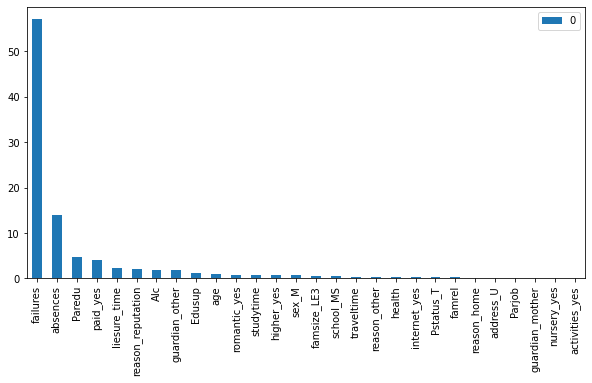

In [95]:
f_val.sort_values(by=[0],ascending=False).plot(kind='bar',figsize=(10,5))
plt.show()

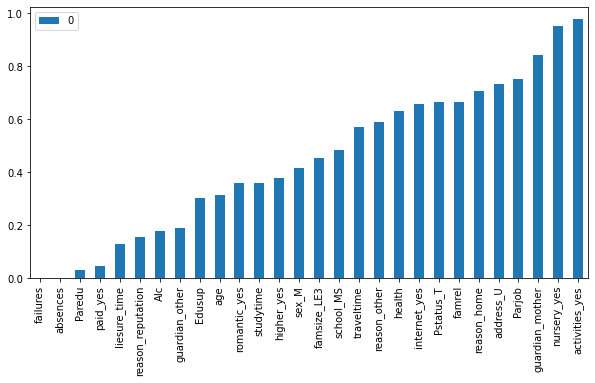

In [97]:
P_val.sort_values(by=[0],ascending=True).plot(kind='bar',figsize=(10,5))
plt.show()

from the graph its clear that features-activities_yes,nurser_yes,guardian_mother,Parjob can be dropped as it wont contribute much for our model

In [98]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'famrel', 'health',
       'absences', 'Paredu', 'liesure_time', 'Alc', 'Edusup', 'Parjob',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'paid_yes', 'activities_yes', 'nursery_yes',
       'higher_yes', 'internet_yes', 'romantic_yes', 'passed_yes'],
      dtype='object')

In [99]:
df.drop(['activities_yes','nursery_yes','guardian_mother','Parjob'],inplace=True,axis=1)

In [100]:
df.shape

(395, 25)

In [101]:
#again split the training and test according to the new columns
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Model Training

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [103]:
models = ['random_forest','svm','decision_tree','logistic_regression','Knn']
model_train_acc=[]
model_test_acc=[]

In [104]:
svm= SVC()
svm.fit(X_train,y_train)
y_hat_train = svm.predict(X_train)
y_hat_test = svm.predict(X_test)
train_acc = np.round(accuracy_score(y_hat_train,y_train),3)
test_acc =  np.round(accuracy_score(y_hat_test,y_test),3)

model_train_acc.append(train_acc)
model_test_acc.append(test_acc)

print("Accuracy Score on train data using SVM: ",train_acc)
print("Accuracy Score on test data using SVM: ",test_acc)

Accuracy Score on train data using SVM:  0.677
Accuracy Score on test data using SVM:  0.658


In [105]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_hat_train = rfc.predict(X_train)
y_hat_test = rfc.predict(X_test)
train_acc = np.round(accuracy_score(y_hat_train,y_train),3)
test_acc =  np.round(accuracy_score(y_hat_test,y_test),3)

model_train_acc.append(train_acc)
model_test_acc.append(test_acc)

print("Accuracy Score on train data using Decision tree: ",train_acc)
print("Accuracy Score on test data using Decision tree: ",test_acc)

Accuracy Score on train data using Decision tree:  1.0
Accuracy Score on test data using Decision tree:  0.671


<AxesSubplot:>

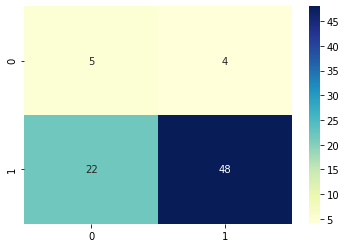

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
cm = confusion_matrix(y_hat_test,y_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

In [108]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_hat_train = tree.predict(X_train)
y_hat_test = tree.predict(X_test)
train_acc = np.round(accuracy_score(y_hat_train,y_train),3)
test_acc =  np.round(accuracy_score(y_hat_test,y_test),3)

model_train_acc.append(train_acc)
model_test_acc.append(test_acc)

print("Accuracy Score on train data using Decision tree: ",train_acc)
print("Accuracy Score on test data using Decision tree: ",test_acc)

Accuracy Score on train data using Decision tree:  1.0
Accuracy Score on test data using Decision tree:  0.696


<AxesSubplot:>

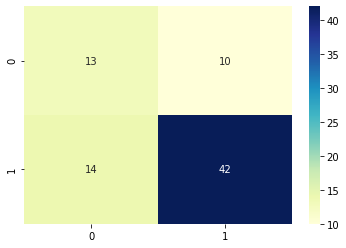

In [109]:
cm = confusion_matrix(y_hat_test,y_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

In [111]:
import warnings
warnings.filterwarnings('ignore')

In [112]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)
train_acc = np.round(accuracy_score(y_hat_train,y_train),3)
test_acc =  np.round(accuracy_score(y_hat_test,y_test),3)

model_train_acc.append(train_acc)
model_test_acc.append(test_acc)

print("Accuracy Score on train data using Decision tree: ",train_acc)
print("Accuracy Score on test data using Decision tree: ",test_acc)

Accuracy Score on train data using Decision tree:  0.747
Accuracy Score on test data using Decision tree:  0.722


In [113]:
accuracy = []
neighbors = np.arange(1,12)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_predicted = classifier.predict(X_test)
    acc = accuracy_score(y_predicted,y_test)
    accuracy.append(acc)

In [114]:
accuracy

[0.6329113924050633,
 0.6075949367088608,
 0.7088607594936709,
 0.620253164556962,
 0.6708860759493671,
 0.6708860759493671,
 0.6708860759493671,
 0.6962025316455697,
 0.6708860759493671,
 0.6582278481012658,
 0.6329113924050633]

<AxesSubplot:>

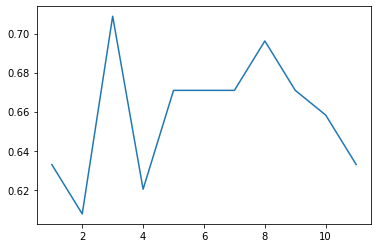

In [115]:
sns.lineplot(x=neighbors,y=accuracy)

In [116]:
# 3 is having suitable values of k

classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train,y_train)
y_hat_train= classifier.predict(X_train)
y_hat_test= classifier.predict(X_test)

train_acc = np.round(accuracy_score(y_hat_train,y_train),3)
test_acc =  np.round(accuracy_score(y_hat_test,y_test),3)

model_train_acc.append(train_acc)
model_test_acc.append(test_acc)

print("Accuracy Score on train data using Decision tree: ",train_acc)
print("Accuracy Score on test data using Decision tree: ",test_acc)

Accuracy Score on train data using Decision tree:  0.813
Accuracy Score on test data using Decision tree:  0.709


<AxesSubplot:>

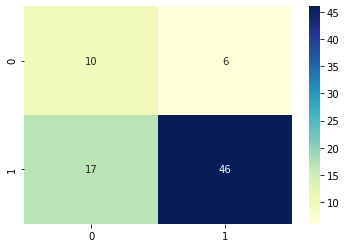

In [117]:
cm = confusion_matrix(y_hat_test,y_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

In [120]:
model_train_acc

[0.677, 1.0, 1.0, 0.747, 0.747, 0.813]

In [121]:
model_test_acc

[0.658, 0.671, 0.696, 0.722, 0.722, 0.709]

From the accuracy , its evident that Decision tree model and KNN is having good scores.Out of the both decision tree is having .722 accuracy and can be taken as the perfect model for the scenario